In [122]:
# Code used for Elo Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%store -r cg
%store -r mg


In [123]:
cg = cg
mg = mg


In [124]:
# Converts a number of wins, losses, and ties to a fractional score (fscore), intended for the valuecounts
def fscore(arr):
    return (arr[0] + arr[2]*0.5)/sum(arr)

# Used to shorten my code and reduce a lot of character repitition, vc short for value counts
def vc(df,cond):
    return df[cond].magnus_result.value_counts()

def vco(df): # vco short for value counts overall
    return df.magnus_result.value_counts()


In [125]:
# https://en.wikipedia.org/wiki/Elo_rating_system
# Lichess uses the glicko2 rating system which is more accurate and way more complex than Elo.
# Therefore, there will be a difference between the ratings on lichess and the ratings I calculate here
# I'll be using the linear performance rating system which is simple compared to the original Elo rating system.
# this rating represents what's the rating necessary to get that performance, that's why its low?
# rating = avrg opponent rating + 800*winratepercentage - 400
def rating(avrgopprating,winratepercentage):
    return avrgopprating + 800*winratepercentage - 400


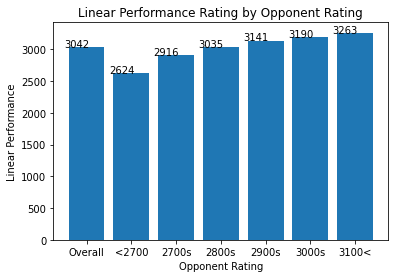

In [126]:
x = ['Overall','<2700','2700s','2800s','2900s','3000s','3100<'] 
y = [rating(np.mean(mg.opp_elo),fscore(vco(mg))),
    rating(np.mean(mg[mg.opp_elo<2700].opp_elo),fscore(vc(mg,mg.opp_elo<2700))),
    rating(np.mean(mg[(mg.opp_elo<2800) &(mg.opp_elo>=2700)].opp_elo),fscore(vc(mg,(mg.opp_elo<2800) &(mg.opp_elo>=2700)))),
    rating(np.mean(mg[(mg.opp_elo<2900) &(mg.opp_elo>=2800)].opp_elo),fscore(vc(mg,(mg.opp_elo<2900) &(mg.opp_elo>=2800)))),
    rating(np.mean(mg[(mg.opp_elo<3000) &(mg.opp_elo>=2900)].opp_elo),fscore(vc(mg,(mg.opp_elo<3000) &(mg.opp_elo>=2900)))),
    rating(np.mean(mg[(mg.opp_elo<3100) &(mg.opp_elo>=3000)].opp_elo),fscore(vc(mg,(mg.opp_elo<3100) &(mg.opp_elo>=3000)))),
    rating(np.mean(mg[mg.opp_elo>3100].opp_elo),fscore(vc(mg,mg.opp_elo>3100)))]
plt.bar(x,y)
plt.title('Linear Performance Rating by Opponent Rating')
plt.xlabel('Opponent Rating')
plt.ylabel('Linear Performance')
for index, value in enumerate(y):
    plt.text(index-0.5, value,
             str(round(value)))
plt.show()


In [127]:
mg

,magnus_color,mag_elo,opp_elo,magnus_result,eco,time_control,datetime
0,black,2500.0,2532.0,lost,E47,60+0,2017.12.14 21:00:02
1,black,2558.0,2420.0,lost,B01,60+0,2017.12.14 21:01:10
2,black,2493.0,2754.0,lost,B01,60+0,2017.12.14 21:04:13
3,black,2566.0,2755.0,lost,A01,60+0,2017.12.14 21:06:30
4,black,2627.0,2275.0,lost,A01,60+0,2017.12.14 21:07:57
...,...,...,...,...,...,...,...
13437,white,3202.0,2984.0,won,B20,180+0,2021.12.23 23:07:55
13438,black,3204.0,2982.0,won,E48,180+0,2021.12.23 23:10:43
13439,white,3207.0,2979.0,won,B20,180+0,2021.12.23 23:15:48
13440,black,3209.0,2977.0,won,E48,180+0,2021.12.23 23:21:54


In [128]:
rating(np.mean(mg[mg.magnus_color=='white'].opp_elo),fscore(vc(mg,mg.magnus_color=='white')))

3069.599940200329

In [129]:
rating(np.mean(mg[mg.magnus_color=='black'].opp_elo),fscore(vc(mg,mg.magnus_color=='black')))

3015.137124241078

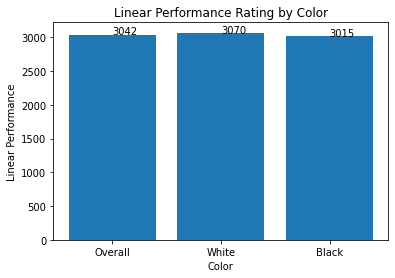

In [130]:
x = ['Overall','White','Black']
y = [rating(np.mean(mg.opp_elo),fscore(vco(mg))),
    rating(np.mean(mg[mg.magnus_color=='white'].opp_elo),fscore(vc(mg,mg.magnus_color=='white'))),
    rating(np.mean(mg[mg.magnus_color=='black'].opp_elo),fscore(vc(mg,mg.magnus_color=='black')))]
    
plt.bar(x,y)
plt.title('Linear Performance Rating by Color')
plt.xlabel('Color')
plt.ylabel('Linear Performance')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value)))
plt.show()

In [131]:
# not influenced by opponent, graph stays
print('Overall: ',np.mean(mg.opp_elo))
print(np.mean(mg[mg.magnus_color=='white'].opp_elo))
print(np.mean(mg[mg.magnus_color=='black'].opp_elo))

Overall:  2867.145886028865
2867.5368515473165
2866.7586257959424


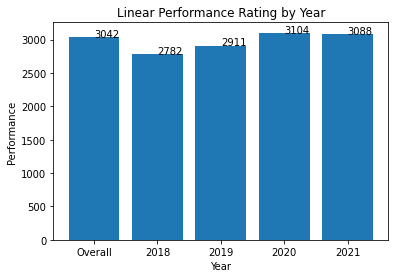

In [132]:
# avrg opponent rating had more influence than win rate here 
x = ['Overall','2018','2019','2020','2021']
y = [rating(np.mean(mg.opp_elo),fscore(vco(mg))),
    rating(np.mean(mg[mg.datetime.str[0:4]=='2018'].opp_elo),fscore(vc(mg,mg.datetime.str[0:4]=='2018'))),
    rating(np.mean(mg[mg.datetime.str[0:4]=='2019'].opp_elo),fscore(vc(mg,mg.datetime.str[0:4]=='2019'))),
    rating(np.mean(mg[mg.datetime.str[0:4]=='2020'].opp_elo),fscore(vc(mg,mg.datetime.str[0:4]=='2020'))),
    rating(np.mean(mg[mg.datetime.str[0:4]=='2021'].opp_elo),fscore(vc(mg,mg.datetime.str[0:4]=='2021')))]
plt.bar(x,y)
plt.title('Linear Performance Rating by Year')
plt.xlabel('Year')
plt.ylabel('Performance')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value)))
plt.show()

In [133]:
print(np.mean(mg[mg.datetime.str[0:4]=='2018'].opp_elo))
print(np.mean(mg[mg.datetime.str[0:4]=='2019'].opp_elo))
print(np.mean(mg[mg.datetime.str[0:4]=='2020'].opp_elo))
print(np.mean(mg[mg.datetime.str[0:4]=='2021'].opp_elo))

2599.0007518796992
2685.139337952271
2938.451991406379
2905.3113592441487


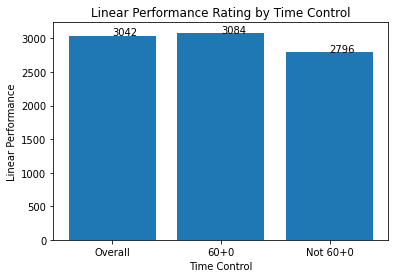

In [134]:
x = ['Overall','60+0','Not 60+0']
y = [rating(np.mean(mg.opp_elo),fscore(vco(mg))),
    rating(np.mean(mg[mg.time_control=='60+0'].opp_elo),fscore(vc(mg,mg.time_control=='60+0'))),
    rating(np.mean(mg[mg.time_control!='60+0'].opp_elo),fscore(vc(mg,mg.time_control!='60+0')))]
plt.bar(x,y)
plt.title('Linear Performance Rating by Time Control')
plt.xlabel('Time Control')
plt.ylabel('Linear Performance')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value)))
plt.show()

In [135]:
print(np.mean(mg[mg.time_control=='60+0'].opp_elo))
print(np.mean(mg[mg.time_control!='60+0'].opp_elo))

2909.6050039229362
2620.038559107052
